In [1]:
import sys
import time
import os
import subprocess
import math
import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import random
import pandas as pd
from matplotlib import gridspec

In [2]:
calib_ = pd.read_csv("../calibrators/allzpa_labels.csv", sep=',')

# calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]

calib_maglim = [44536,68535,5896,48334, 40809]  # reject

# calib_weird = [68535, 28378, 42081, 39461, 44536, 21102,50073, 5896, 15345] # infrared
calib_weird = [68535, 28378, 42081, 39461, 44536]   # optical


for col in calib_.columns:
    newcol = col.strip()
    calib_.rename(columns={col:newcol}, inplace=True)

calib_['I'] = calib_.i-calib_.dm19

calib_ = calib_[(calib_.I>-17)&(calib_.i>0)]
    
calib_.head(20)

,PGC,So,Name,dm19,inc,lgWmxi,eWi,Mu,Mg,Mr,...,NW1,MW2,u,g,r,i,z,W1,W2,I
23,3974,1,UGC685,28.41,64,1.880,0.029,-13.98,-14.99,-15.33,...,0.00,0.00,14.43,13.42,13.08,12.90,12.79,0.00,0.00,-15.51
27,6699,1,UGC1281,28.61,90,2.034,0.008,-15.67,-16.28,-16.46,...,-15.39,-14.85,12.94,12.33,12.15,11.74,11.79,13.22,13.76,-16.87
37,19871,1,UGC3600,30.04,81,1.999,0.036,-14.82,-15.37,-15.55,...,0.00,0.00,15.22,14.67,14.49,14.25,14.55,0.00,0.00,-15.79
39,22277,1,UGC4115,29.48,67,1.890,0.023,-14.94,-15.47,-15.63,...,-14.83,-14.20,14.54,14.01,13.85,13.63,13.70,14.65,15.28,-15.85
45,28378,1,UGC5288,30.31,45,2.095,0.060,-15.73,-16.46,-16.80,...,0.00,0.00,14.58,13.85,13.51,13.35,13.32,0.00,0.00,-16.96
50,38148,1,NGC4068,28.21,53,1.883,0.059,-14.72,-15.47,-15.70,...,-15.09,-14.64,13.49,12.74,12.51,12.37,12.35,13.12,13.57,-15.84
57,41020,1,UGC7599,28.37,65,1.882,0.041,-13.11,-13.86,-14.02,...,-12.94,-12.10,15.26,14.51,14.35,14.21,14.26,15.43,16.27,-14.16
59,41093,1,KK149,29.65,52,1.997,0.088,-13.94,-14.65,-14.93,...,0.00,0.00,15.71,15.00,14.72,14.55,14.52,0.00,0.00,-15.10
76,46127,1,UGC8331,28.22,76,1.745,0.049,-13.74,-14.37,-14.55,...,-13.57,-13.02,14.48,13.85,13.67,13.54,13.76,14.65,15.20,-14.68
80,49448,1,UGC8837,29.30,79,1.959,0.025,-16.06,-16.38,-16.67,...,-15.90,-15.20,13.24,12.92,12.63,12.45,12.35,13.40,14.10,-16.85


In [3]:
####################################### Set Axes
def set_axes(ax, xlim=None, ylim=None, fontsize=16, twinx=True, twiny=True, minor=True, inout='in'):
        
        if not ylim is None:
            ax.set_ylim(ylim)
        else:
            ylim = ax.get_ylim() 
            
        if not xlim is None:    
            ax.set_xlim(xlim) 
        else:
            xlim = ax.get_xlim()
            
        ax.tick_params(which='major', length=6, width=1., direction=inout)
#         if minor:
        ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)  
        
        if twiny:
            y_ax = ax.twinx()
            y_ax.set_ylim(ylim)
            y_ax.set_yticklabels([])
            y_ax.minorticks_on()
            y_ax.tick_params(which='major', length=6, width=1., direction=inout)
            if minor:
                y_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout) 
        
        if twinx:
            x_ax = ax.twiny()
            x_ax.set_xlim(xlim)
            x_ax.set_xticklabels([])
            x_ax.minorticks_on()
            x_ax.tick_params(which='major', length=6, width=1.0, direction=inout)
            if minor:
                x_ax.tick_params(which='minor', length=3, color='#000033', width=1.0, direction=inout)     

        for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(fontsize) 
        
        return x_ax, y_ax

In [4]:
rej = pd.read_csv("oreject60.csv", sep=',')

rej.head()


,PGC,Mi,logW,a,b
0,13913,-20.31,2.222,4045,2.268
1,5057374,-16.95,2.020,,
2,43552,-17.80,2.495,,
3,4004242,-16.88,2.174,,
4,5057674,-16.96,2.083,,


In [5]:
# df = pd.read_csv("CF4_TF_distances.csv", sep='|')
df = pd.read_csv("../calibrators/DMs_EDD.csv.test", sep='|')


for col in df.columns:
    newcol = col.strip()
    df.rename(columns={col:newcol}, inplace=True)


print(df.columns)
print(len(df))

df.head()

Index([u'pgc', u'Vh', u'Vls', u'V3k', u'Vmod', u'f_cosmology', u'logWimx',
       u'logWimx_e', u'inc', u'Sqlt', u'Wqlt', u'DM_best', u'dDM_best', u'DMr',
       u'dDMr', u'RMS_r', u'DMr_raw', u'DMi', u'dDMi', u'RMS_i', u'DMi_raw',
       u'DMz', u'dDMz', u'RMS_z', u'DMz_raw', u'DM_w1', u'dDM_w1', u'RMS_w1',
       u'DMw1_raw', u'ggg', u'rrr', u'iii', u'zzz', u'w1', u'w2', u'RA',
       u'DEC', u'gl', u'gb', u'sgl', u'sgb', u'pgc1', u'Nest', u'Vmodg',
       u'Nkt', u'N15', u'sglg', u'sgbg', u'RS', u'P0', u'DM_src'],
      dtype='object')
10737


,pgc,Vh,Vls,V3k,Vmod,f_cosmology,logWimx,logWimx_e,inc,Sqlt,...,pgc1,Nest,Vmodg,Nkt,N15,sglg,sgbg,RS,P0,DM_src
0,2,5004,5296,4726,4786,1.013,2.744,0.029,52,0,...,73150,200275,4976,0,7,341.4922,20.7395,2,2.02,2
1,4,4458,4706,4109,4154,1.011,2.189,0.014,85,5,...,120,202766,4154,0,0,316.0587,18.4514,2,-2.75,1
2,12,6548,6685,6195,6297,1.016,2.606,0.021,82,0,...,12,210177,6279,0,1,286.4249,11.3510,2,0.56,2
3,16,5667,5809,5312,5387,1.014,2.515,0.025,65,5,...,16,211419,5434,0,1,287.6120,11.7030,2,0.92,1
4,55,4779,5052,4454,4507,1.012,2.260,0.025,80,5,...,55,0,4507,0,0,327.0996,19.7763,2,-2.83,1


In [6]:
calib_maglim = [3974, 6699, 19871, 22277, 38148, 41020, 41066, 41093, 46127, 49448, 53641, 28378, 6699, 9962, 12460, 13163, 22277, 26761, 29128, 38148, 41020, 41066, 44982, 45084, 46127, 49448, 53641, 67908, 72228, 21102, 50073]

calib_maglim += [44536,68535,5896,48334, 40809]  # reject

# calib_maglim += [68535, 28378, 42081, 39461, 44536, 21102,50073, 5896, 15345] # infrared
calib_maglim += [68535, 28378, 42081, 39461, 44536]   # optical

df['pgc'] = df['pgc'].apply(lambda x: x if not x in rej.PGC.values else None)
df['pgc'] = df['pgc'].apply(lambda x: x if not x in calib_maglim else None)

print(len(df[df.pgc.isna()]))

df = df.dropna()
df.set_index('pgc', inplace=True)

print(len(df))

90
10647


In [7]:
calib = pd.read_csv("../calibrators/allzpa_labels.csv", sep=',')

for col in calib.columns:
    newcol = col.strip()
    calib.rename(columns={col:newcol}, inplace=True)
            
calib.set_index('PGC', inplace=True)

calib = calib[["dm19", "i"]].join(df[["iii", "logWimx", "logWimx_e", "Sqlt", "Wqlt"]]).dropna()
calib = calib[(calib.Sqlt>2) & (calib["iii"]>0)]
calib["I"] = calib['iii'] - calib.dm19

print(len(calib))
calib.head()

39


,dm19,i,iii,logWimx,logWimx_e,Sqlt,Wqlt,I
PGC,,,,,,,,
21396,27.514,7.66,7.66,2.454,0.026,4.0,5.0,-19.854
28357,32.327,11.43,11.43,2.454,0.022,5.0,5.0,-20.897
28630,27.805,6.06,6.06,2.706,0.020,5.0,5.0,-21.745
32192,30.165,8.45,8.45,2.630,0.025,5.0,5.0,-21.715
32207,32.149,11.37,11.37,2.514,0.022,5.0,5.0,-20.779


In [8]:
from scipy import polyval, polyfit
from scipy.optimize import curve_fit

def linfit(x, m, b):
    return m * x + b

def quadfit(x, m, n, b):
    return m * x**2 + n * x + b 

def linfit_b(x, m):
    return m * x

## When the slope is fixed, 'b' the intercept is variable
def linfit_m(x, b):
    return x+b


def bilinear(x, m1, b1, m2, eps):
    
    x0 = -20+eps 
    b2 = b1 - x0*(m2-m1)
    
       
    y1 = m1 * x + b1
    y2 = m2 * x + b2
    
    y = np.asarray([y1[i] if x[i]<=x0 else y2[i] for i in range(len(x))])
    
    return y



def TF_fit(mag_f, logWimx_f, logWimx_e_f, slope=None, fitFunc=linfit, returnFit=False):


    if slope is None :
        fit, cov = curve_fit(fitFunc, mag_f, logWimx_f-2.5, sigma=np.sqrt(logWimx_e_f**2+0.01**2))
    else:
        fitFunc = linfit_m
        fit, cov = curve_fit(fitFunc, mag_f/slope, logWimx_f-2.5, sigma=np.sqrt(logWimx_e_f**2+0.01**2))
    
    if not returnFit:
        if slope is None :
            m, b = fit
            me = np.sqrt(cov[0,0])
            be = np.sqrt(cov[1,1])
            mbe = cov[1,0]    
            m0 = 1./m
            b0 = -b/m
            dm0 = np.abs(me/m**2)
            db0 = np.sqrt((b0**2 )*(be**2/b**2+me**2/m**2-2*mbe/m/b))
        else:
            b = fit[0]
            me = 0
            be = np.sqrt(cov[0])
            m0 = slope
            b0 = -b*slope
            dm0 = 0
            db0 = np.abs(slope*be)          

    
        return m0,b0,dm0,db0
    else:
        return fit, cov


(-7.580134293938569, -20.990892792189715)
(-10.679601774077444, -21.200562530296633)


/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.
/media/Data/Home/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


(<matplotlib.axes._subplots.AxesSubplot at 0x7f18635a6610>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f186360f550>)

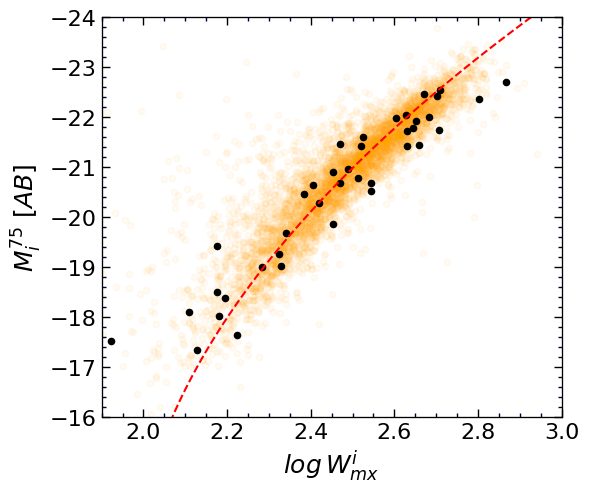

In [9]:
df['logD'] = np.log10(df.Vmod / 75.)
df['DM'] = 5*df.logD + 25 
df['M_i'] = df['iii'] - df.DM



fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0

ax = plt.subplot(gs[p]) ; p+=1


dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2)]
dff.plot.scatter(x='logWimx', y='M_i', alpha=0.05, ax=ax, color='orange')



dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2) & (df.M_i<-20.5)]
mag_f = dff.M_i.values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff['logWimx_e'].values
m0,b0,dm0,db0 = TF_fit(mag_f, logWimx_f, logWimx_e_f)
u = np.linspace(2,3,100)
v = m0*(u-2.5) + b0
# ax.plot(u, v, 'k--')
print(m0, b0)


dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2) & (df.M_i>-20.5)]
mag_f = dff.M_i.values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff['logWimx_e'].values
m0,b0,dm0,db0 = TF_fit(mag_f, logWimx_f, logWimx_e_f)
u = np.linspace(2,3,100)
v = m0*(u-2.5) + b0
# ax.plot(u, v, 'r--')
print(m0, b0)


### Quadric
dff = df[(df.Vmod>4000) & (df["iii"]) & (df.Sqlt>2)]
mag_f = dff.M_i.values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff['logWimx_e'].values
fit, cov = TF_fit(mag_f, logWimx_f, logWimx_e_f, fitFunc=quadfit, returnFit=True)
v = np.linspace(-24,-16,100)
u = fit[0]*(v)**2 + fit[1]*(v) + fit[2] + 2.5
ax.plot(u, v, 'r--')


# dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2)]
# mag_f = dff.M_i.values
# logWimx_f = dff.logWimx.values
# logWimx_e_f = dff['logWimx_e'].values
# fit, cov = TF_fit(mag_f, logWimx_f, logWimx_e_f, fitFunc=bilinear, returnFit=True)
# v = np.linspace(-24,-16,100)

# x0 = -20+fit[3] 
# b2 = fit[1] - x0*(fit[2]-fit[0])

# v = np.linspace(-24,-20.33,100)
# u = fit[0]*(v) + fit[1] + 2.5
# ax.plot(u, v, '-', color='purple')
# v = np.linspace(-20.33,-16,100)
# u = fit[2]*(v) + b2 + 2.5
# ax.plot(u, v, '-', color='maroon')



calib.plot.scatter(x='logWimx', y='I', alpha=1, ax=ax, color='k')



ax.set_xlabel(r'$log \/ W_{mx}^i$', fontsize=18) 
ax.set_ylabel(r'$M^{75}_{i} \/\/ [AB]$', fontsize=18)
set_axes(ax, (1.9,3), (-16,-24))

(<matplotlib.axes._subplots.AxesSubplot at 0x7f186078dbd0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f18656919d0>)

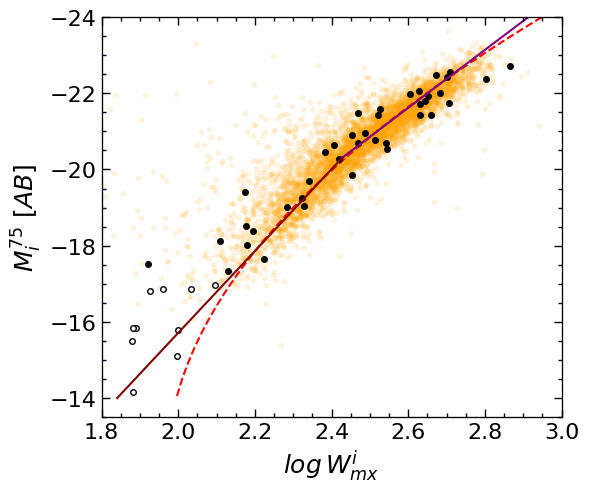

In [10]:
dff = df[(df.Vmod>4000) & (df["iii"]) & (df.Sqlt>2)]
mag_f = dff.M_i.values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff.logWimx_e.values
fit, cov = TF_fit(mag_f, logWimx_f, logWimx_e_f, fitFunc=quadfit, returnFit=True)

def quadfit_zp(x, zp):
    x = x+zp
    return fit[0]*(x)**2 + fit[1]*(x) + fit[2]

dM, cov_dm = curve_fit(quadfit_zp, calib.I.values, calib.logWimx.values-2.5, 
                     sigma=np.sqrt(calib.logWimx_e.values**2+0.01**2))



fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1


dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2)]
ax.plot(dff.logWimx.values, dff.M_i.values-dM[0], '.', alpha=0.1, color='orange')



v = np.linspace(-24,-14,100)
u = quadfit_zp(v, dM[0]) + 2.5
ax.plot(u, v, 'r--')


ax.plot(calib.logWimx.values, calib.I.values, 'ko', alpha=1, ms=4)
ax.plot(calib_.lgWmxi.values, calib_.I.values, 'ko', alpha=1, ms=4, mfc='white')





################33
dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2)]
mag_f = dff.M_i.values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff['logWimx_e'].values
fit, cov = TF_fit(mag_f, logWimx_f, logWimx_e_f, fitFunc=bilinear, returnFit=True)
v = np.linspace(-24,-16,100)

x0 = -20+fit[3] 
b2 = fit[1] - x0*(fit[2]-fit[0])

v = np.linspace(-24,-20.31,100)
u = fit[0]*(v+dM[0]) + fit[1] + 2.5
ax.plot(u, v, '-', color='purple')
v = np.linspace(-20.31,-14,100)
u = fit[2]*(v+dM[0]) + b2 + 2.5
ax.plot(u, v, '-', color='maroon')






ax.set_xlabel(r'$log \/ W_{mx}^i$', fontsize=18) 
ax.set_ylabel(r'$M^{75}_{i} \/\/ [AB]$', fontsize=18)
set_axes(ax, (1.8,3), (-13.5,-24))



# u=np.linspace(1.5,4,100)
# v=-8.32*(u-2.5)-20.80
# ax.plot(u, v, ':', color='green')



(-7.602701011543559, -20.987931668870026, 0.08533213678309576, 0.010051521822623736)
(-10.74639929921481, -21.21504791045947, 0.2253335371429567, 0.04003184638690257)
(-20.316893533266967, 0.007405316188373533)
('zp1', -20.86687803532642, 0.08663919020468863)
('zp2', -21.093994276915865, 0.09490977248691568)


(-20.31700000882386, -20.31674303032752)

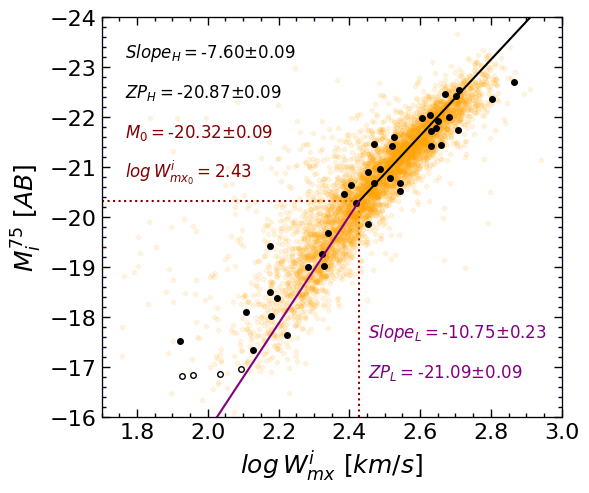

In [11]:
def bilinear(x, m1, b1, m2, eps):
    x0 = -20+eps 
    b2 = b1 - x0*(m2-m1)
    y1 = m1 * x + b1
    y2 = m2 * x + b2
    y = np.asarray([y1[i] if x[i]<=x0 else y2[i] for i in range(len(x))])
    return y



dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2)]
mag_f = dff.M_i.values
logWimx_f = dff.logWimx.values
logWimx_e_f = dff['logWimx_e'].values
fit, cov = TF_fit(mag_f, logWimx_f, logWimx_e_f, fitFunc=bilinear, returnFit=True)
M0 = -20+fit[3] 

def bilinear2(x, m1, b1, m2, b2):
    y1 = m1 * x + b1
    y2 = m2 * x + b2
    y = np.asarray([y1[i] if x[i]<=M0 else y2[i] for i in range(len(x))])
    return y

fit, cov = TF_fit(mag_f, logWimx_f, logWimx_e_f, fitFunc=bilinear2, returnFit=True)
m1 = fit[0]
b1 = fit[1]
m2 = fit[2]
b2 = fit[3]

def bilinear_zp(x, zp):
    
    return bilinear2(x+zp, m1, b1, m2, b2)



dM, cov_dm = curve_fit(bilinear_zp, calib.I.values, calib.logWimx.values-2.5, 
                     sigma=np.sqrt(calib.logWimx_e.values**2+0.01**2))



fig = py.figure(figsize=(5, 5), dpi=100)    
fig.subplots_adjust(wspace=0, top=0.92, bottom=0.12, left=0.06, right=0.98)
gs = gridspec.GridSpec(1,1) ; p=0
ax = plt.subplot(gs[p]) ; p+=1




dff = df[(df.Vmod>4000) & (df["iii"]>0) & (df.Sqlt>2)]
ax.plot(dff.logWimx.values, dff.M_i.values-dM[0], '.', alpha=0.1, color='orange')



ax.plot(calib.logWimx.values, calib.I.values, 'ko', alpha=1, ms=4)
ax.plot(calib_.lgWmxi.values, calib_.I.values, 'ko', alpha=1, ms=4, mfc='white')



v = np.linspace(-24,-16,100)


v = np.linspace(-24,x0-dM[0],100)
u = m1*(v+dM[0]) + b1 + 2.5
ax.plot(u, v, '-', color='black')
v = np.linspace(x0-dM[0],-14,100)
u = m2*(v+dM[0]) + b2 + 2.5
ax.plot(u, v, '-', color='purple')




ax.set_xlabel(r'$log \/ W_{mx}^i \/\/[km/s]$', fontsize=18) 
ax.set_ylabel(r'$M^{75}_{i} \/\/ [AB]$', fontsize=18)
set_axes(ax, (1.7,3), (-16,-24))

#########################################################################################
m1 = fit[0] ; dm1 = cov[0][0]
b1 = fit[1] ; db1 = cov[1][1]
m2 = fit[2] ; dm2 = cov[2][2]
b2 = fit[3] ; db2 = cov[3][3]

m1e = np.sqrt(dm1)
b1e = np.sqrt(db1)
mbe = cov[1,0]    
m10 = 1./m1
b10 = -b1/m1
dm10 = np.abs(m1e/m1**2)
db10 = np.sqrt((b10**2 )*(b1e**2/b1**2+m1e**2/m1**2-2*mbe/m1/b1))


m2e = np.sqrt(dm2)
b2e = np.sqrt(db2)
mbe = cov[2,3]    
m20 = 1./m2
b20 = -b2/m2
dm20 = np.abs(m2e/m2**2)
db20 = np.sqrt((b20**2 )*(b2e**2/b2**2+m2e**2/m2**2-2*mbe/m2/b2))



print(m10, b10, dm10, db10)
print(m20, b20, dm20, db20)
print(M0-dM[0], cov_dm[0][0])
# (-7.602701011543559, -20.987931668870026, 0.08533213678309576, 0.010051521822623736)
# (-10.74639929921481, -21.21504791045947, 0.2253335371429567, 0.04003184638690257)
# -20.316893533266967
logW0 = 0.5*(m1*(M0)+b1+2.5+m2*(M0)+b2+2.5)

b10_f = b10-dM[0]
b20_f = b20-dM[0]

db10_f = np.sqrt(cov_dm[0][0]+db10**2)
db20_f = np.sqrt(cov_dm[0][0]+db20**2)
print("zp1", b10_f, db10_f)
print("zp2", b20_f, db20_f)

Mt1 = m10*(logW0-2.5) + b10_f
Mt2 = m20*(logW0-2.5) + b20_f

Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
x0 = 0.95*Xlm[0]+0.05*Xlm[1]
y0 = 0.1*Ylm[0]+0.90*Ylm[1]
ax.text(x0,y0, r"$Slope_H = $"+"%.2f" % m10+'$\pm$'+"%.2f" % dm10, fontsize=12, color='k')
y0 = 0.2*Ylm[0]+0.80*Ylm[1]
ax.text(x0,y0, r"$ZP_H = $"+"%.2f" % b10_f+'$\pm$'+"%.2f" % db10_f, fontsize=12, color='k')
y0 = 0.3*Ylm[0]+0.70*Ylm[1]
ax.text(x0,y0, r"$M_0 = $"+"%.2f" % (0.5*(Mt1+Mt2))+'$\pm$'+"%.2f" % np.sqrt(cov_dm[0][0]), fontsize=12, color='maroon')
y0 = 0.4*Ylm[0]+0.60*Ylm[1]
ax.text(x0,y0, r'$log \/ W_{mx_0}^i = $'+"%.2f" % (logW0), fontsize=12, color='maroon')



Ylm = ax.get_ylim() ; Xlm = ax.get_xlim()
x0 = 0.42*Xlm[0]+0.58*Xlm[1]
y0 = 0.80*Ylm[0]+0.2*Ylm[1]
ax.text(x0,y0, r"$Slope_L = $"+"%.2f" % m20+'$\pm$'+"%.2f" % dm20, fontsize=12, color='purple')
y0 = 0.90*Ylm[0]+0.10*Ylm[1]
ax.text(x0,y0, r"$ZP_L = $"+"%.2f" % b20_f+'$\pm$'+"%.2f" % db20_f, fontsize=12, color='purple')

ax.vlines(x=logW0, ymin=-16, ymax=Mt1, color='maroon', linestyle='dotted')
ax.hlines(y=Mt1, xmin=1.7, xmax=logW0, color='maroon', linestyle='dotted')

Mt1, Mt2